In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'sans-serif'  
mpl.rcParams['font.size'] = 10  

# Clustering analysis

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
#plt.style.use('ggplot')

In [4]:
dfr=pd.read_csv('../results/stationary_state.csv')
dfr.shape[0]

1000000

In [5]:
# Average time series of the last ticks by experiment
dfr_sum=dfr.groupby('experiment').mean()
dfr_sum.shape[0]

1000

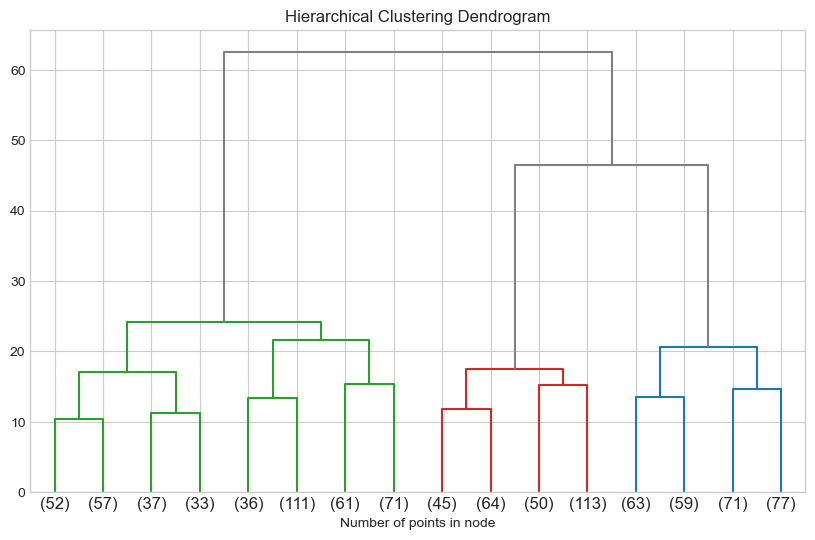

In [6]:
# Assuming the next variables as the features for the clustering algorithm
features = ['mu-logistic-whaling-success', 'whaling-harm-prob', 'theta', 'mutation-prob', 
            '(mean) average-whale-hunt', '(mean) average-help-others']

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler().fit(dfr_sum[features])
X_scaled = scaler.transform(dfr_sum[features])

# Agglomerative Clustering: metric default="euclidean", linkage default='ward'
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,compute_distances=True)
model = model.fit(X_scaled)

# Create a dendrogram (source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    # Plot the corresponding dendrogram
    hierarchy.set_link_color_palette(['tab:green','tab:red', 'tab:blue'])
    dendrogram(linkage_matrix, color_threshold=30, above_threshold_color="grey",**kwargs)

# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node")
plt.savefig('../figures/clusters_dendrogram.svg', format='svg',bbox_inches='tight')
plt.show()


In [7]:
# Agglomerative Clustering: metric default="euclidean", linkage default='ward'
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(X_scaled)
# Add cluster labels
dfr_sum['cluster_labels'] = model.labels_
dfr_sum.groupby('cluster_labels').size()

cluster_labels
0    458
1    270
2    272
dtype: int64

In [8]:
state_features={0:{'label':'AC','color':'tab:green'},1:{'label':'OWH','color':'tab:blue'},2:{'label':'AD','color':'tab:red'}} # AC: All Cooperation, OWH: Only Whale Hunt, AD: All Defection

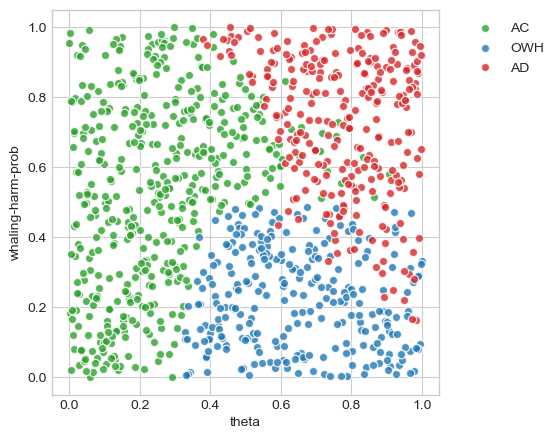

In [9]:
# 
fig=plt.figure(figsize=(5,5))
for state in sorted(dfr_sum['cluster_labels'].unique()):
    plt.scatter(dfr_sum[dfr_sum['cluster_labels'] == state]['theta'],
                dfr_sum[dfr_sum['cluster_labels'] == state]['whaling-harm-prob'],
                color=state_features[state]['color'],label=state_features[state]['label'],
                edgecolors='white', alpha=0.8)
plt.xlabel('theta')
plt.ylabel('whaling-harm-prob')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../figures/clusters_in_parametric_space.svg', format='svg',bbox_inches='tight')
plt.show()

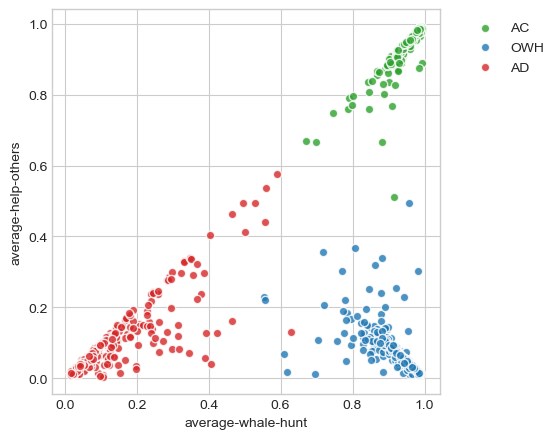

In [10]:
fig=plt.figure(figsize=(5,5))
for state in sorted(dfr_sum['cluster_labels'].unique()):
    plt.scatter(dfr_sum[dfr_sum['cluster_labels'] == state]['(mean) average-whale-hunt'],
                dfr_sum[dfr_sum['cluster_labels'] == state]['(mean) average-help-others'],
                color=state_features[state]['color'],label=state_features[state]['label'],
                edgecolors='white', alpha=0.8)
plt.xlabel('average-whale-hunt')
plt.ylabel('average-help-others')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../figures/clusters_in_strategies_space.svg', format='svg',bbox_inches='tight')
plt.show()